# STAD68 Assignment 2

## Problem 2

In [1]:
%matplotlib inline
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random
from sklearn.metrics import zero_one_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from PIL import Image
from matplotlib import pyplot
from pylab import * 
from matplotlib.ticker import MultipleLocator

In [2]:
# load text file as n*m array
pixels = np.loadtxt('uspsdata.txt')
label = np.loadtxt('uspscl.txt')
# size of n and m
# pixels.shape

Q1: Reproduce the plot of the first digit, but replace the upper right pixel with a gray pixel.

In [3]:
firstDigit = pixels[0,:].reshape(16, 16)
firstDigit[0,15]=100
img = Image.fromarray(firstDigit)
img.show()

################# The graph will be attached as a png file ###########################

### Another way of doing this
#from matplotlib import pyplot as plt
#plt.gray()
#plt.imshow(firstDigit, interpolation='nearest')
#plt.savefig('firstDigit.png')
#plt.show()

Q2: Randomly select about 20% of the data and set it aside as a test set. Train a linear SVM with soft
margin. Cross-validate the margin parameter using 5-fold cross validation. Plot the cross-validation
estimates of the misclassification rate. Plot the rate as a function of the margin parameter. Report the
test set estimates of the misclassification rate, with the parameter values you have selected by cross
validation.

In [4]:
# randomly select about 20% of the data and set it as a test set
pixels_train, pixels_test, label_train, label_test = train_test_split(pixels, label, test_size=0.2, random_state=41)

# train a linear svm with soft margin
# cross-validate the margin parameter using 5-fold cv by grid search

### Search for best c by this range of C firstly

# rangeSize should be a even number
rangeSize = 40
lis = np.zeros(rangeSize,)
count = 0
for i in range(-rangeSize/2, rangeSize/2):
    lis[count]=exp(i)
    count += 1
    
# set the tuned_parameters with possible values for C
tuned_parameters = {'C': lis}

# set the scoring function to accracy_score
accuracy_scorer = make_scorer(accuracy_score)

# grid search to find the best C value
clf = GridSearchCV(svm.SVC(kernel='linear'), tuned_parameters, cv=5, scoring=accuracy_scorer)

# must fit the model first
clf.fit(pixels_train, label_train)

# the value of C after cross validation
bestC = clf.best_params_.get('C')

print("Best parameter found:")

# which is exp(-16)
print(clf.best_params_)

Best parameter found:
{'C': 1.1253517471925912e-07}


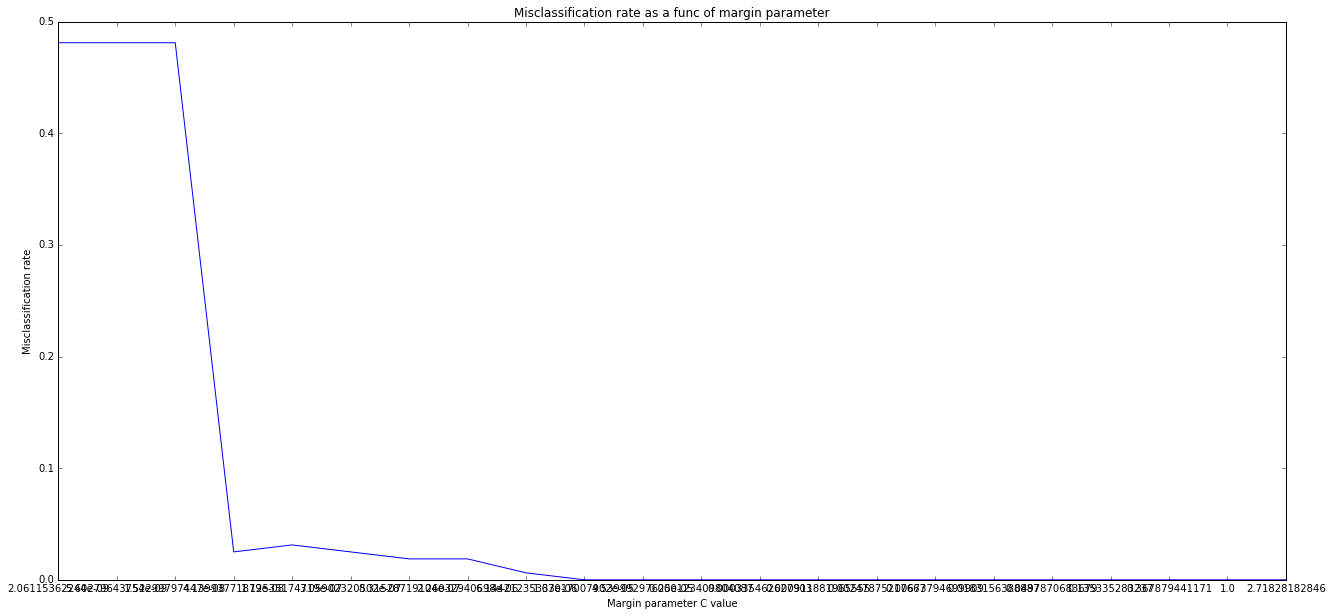

In [5]:
#Plot the cross-validation estimates of the misclassification rate. 
#Plot the rate as a function of the margin parameter.

# zoom in from (exp(-20), exp(20)) to (exp(-20), exp(-5)) 
# on purpose of more decent graph

lis = np.zeros(22,)
count = 0
for i in range(-20, 2):
    lis[count]=exp(i)
    count += 1
    
rate = np.zeros(22,)
i = 0

# use cross-validation for each possible C value to get the corresponding misclassification rate
# by iterating the possible value of c
for c in lis:
    tuned_parameters = {'C': [c]}
    clf = GridSearchCV(svm.SVC(kernel='linear'), tuned_parameters, cv=5, scoring=accuracy_scorer)
    clf.fit(pixels_train, label_train)
    
    # predict the model on training data to get the training error
    label_pred = clf.predict(pixels_train)
    # this is the percentage that data is classified correctly
    acc = accuracy_score(label_train, label_pred)
    # store this error rate to array
    error_rate = 1-acc
    rate[i] = error_rate
    i +=1

pyplot.figure(figsize=(22,10))
ax=pyplot.gca()  
ax.set_xticks(np.linspace(0,1,22))   
ax.set_xticklabels(lis)
ax.set_ylim(0, 0.5) 
ax.set_xlabel('Margin parameter C value')
ax.set_ylabel('Misclassification rate')
ax.set_title('Misclassification rate as a func of margin parameter')
pyplot.plot(np.linspace(0,1,22), rate)
pyplot.show()

In [6]:
# misclassification rate on test set with the selected parameter by cv
tuned_parameters = {'C': [bestC]}

clf = GridSearchCV(svm.SVC(kernel='linear'), tuned_parameters, cv=5, scoring=accuracy_scorer)
clf = clf.fit(pixels_train, label_train)

label_pred = clf.predict(pixels_test)
error_rate = 1-accuracy_score(label_test, label_pred)
print('The test estimates of the misclassification rate with the parameter value selected by cross validation is:')

print error_rate

The test estimates of the misclassification rate with the parameter value selected by cross validation is:
0.025


Q3: Train an SVM with soft margin and RBF kernel. You will have to cross-validate both the soft-margin
parameter and the kernel bandwidth. Plot the cross-validation estimates of the misclassification rate.
Plot the rate as a function of the margin parameter and bandwidth. Report the test set estimates of
the misclassification rate, with the parameter values you have selected by cross validation.

In [7]:
# same procedure as linear SVM, just change kernel to rbf and add a new parameter gamma
lis = np.zeros(rangeSize,)
count = 0
for i in range(-rangeSize/2, rangeSize/2):
    lis[count]=exp(i)
    count += 1


tuned_parameters={'gamma': lis, 'C': lis}
clf = GridSearchCV(svm.SVC(kernel='rbf'), tuned_parameters, cv=5, scoring=accuracy_scorer)
clf.fit(pixels_train, label_train)

# which is exp(-1)
bestC1 = clf.best_params_.get('C')
# which is exp(-13)
bestGamma1 = clf.best_params_.get('gamma')
print("Best parameter found:")
print(clf.best_params_)

Best parameter found:
{'C': 0.36787944117144233, 'gamma': 2.2603294069810542e-06}


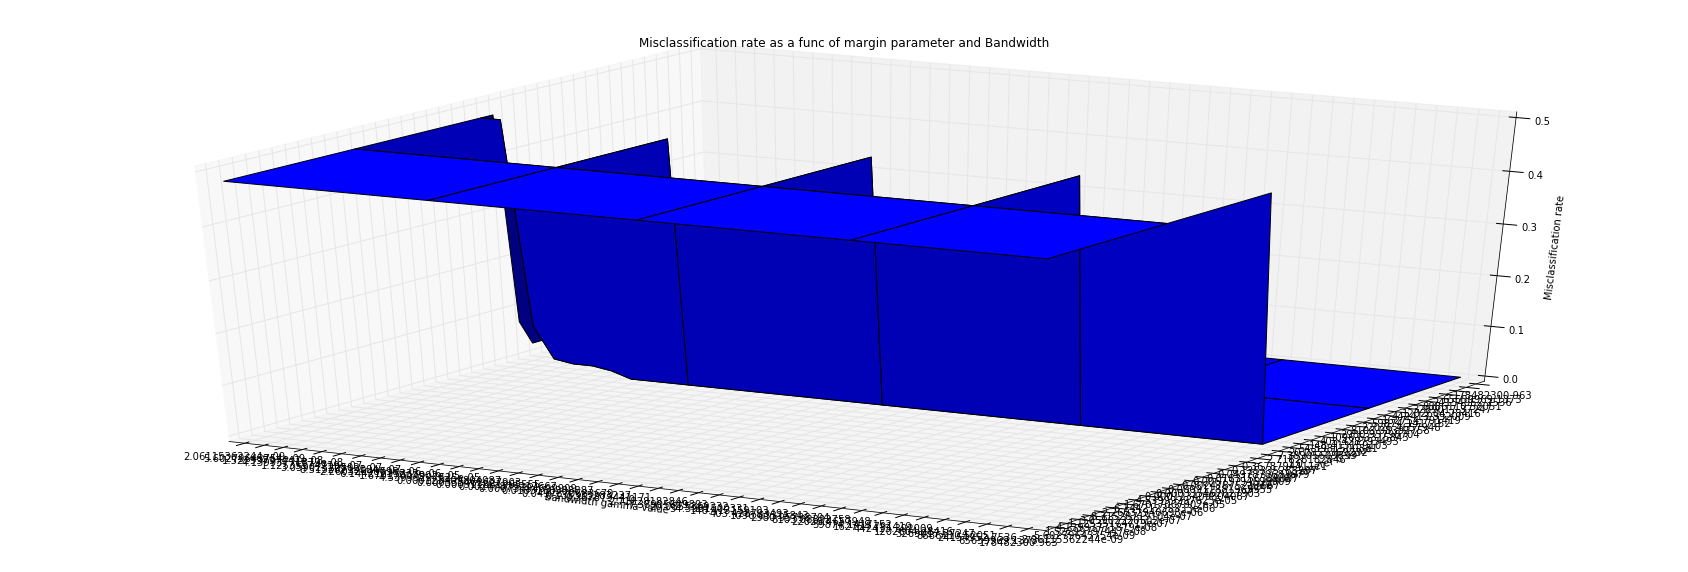

In [8]:
rate = np.zeros(rangeSize*rangeSize,)
i = 0

# use cross-validation for each possible C and gamma value to get the corresponding misclassification rate
# by iterating the possible value of C and gamma
for c in lis:
    for g in lis:
        tuned_parameters = {'C': [c], 'gamma':[g]}
        clf = GridSearchCV(svm.SVC(kernel='rbf', C=c, gamma=g), tuned_parameters, cv=5, scoring=accuracy_scorer)
        clf = clf.fit(pixels_train, label_train)
        label_pred = clf.predict(pixels_train)
        error_rate = 1-accuracy_score(label_train, label_pred)
        # store this error rate to array
        rate[i] = error_rate
        i += 1

#Plot the cross-validation estimates of the misclassification rate.
#plot the rate as a function of the margin parameter and bandwidth in 3d       
X = y = np.linspace(0,1,rangeSize)
pyplot.figure(figsize=(30,10))
ax=pyplot.gca(projection='3d')  
ax.set_xticks(X)   
ax.set_xticklabels(lis)
ax.set_yticks(y)   
ax.set_yticklabels(lis)
X, y = np.meshgrid(X, y)
rate = rate.reshape(rangeSize, rangeSize)
ax.plot_surface(X,y, rate)
ax.set_xlabel('Bandwidth gamma value')
ax.set_ylabel('Margin parameter C value')
ax.set_zlabel('Misclassification rate')
ax.set_title('Misclassification rate as a func of margin parameter and Bandwidth')
pyplot.show()

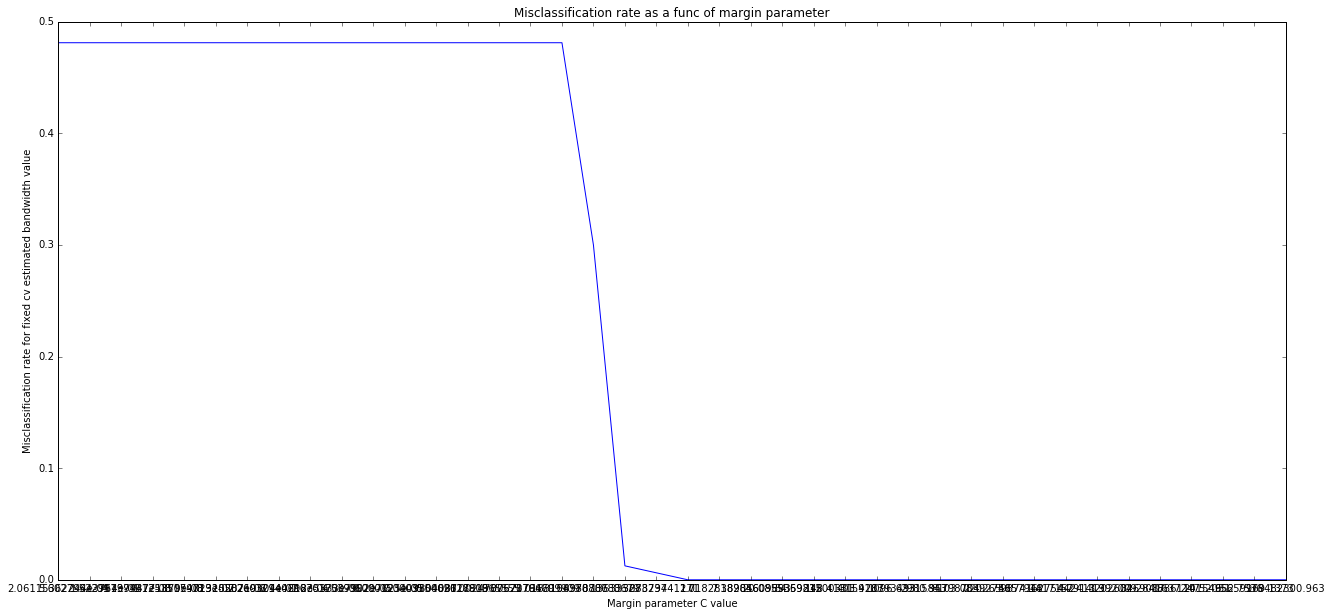

In [9]:
# plot the cross-validation estimates of the misclassification rate
# as a function of margin parameter for fixed bandwidth at its best estimated value

# reshape rate to find misclassification rate as one parameter with the other one fixed
rate = rate.reshape(rangeSize,rangeSize)

pyplot.figure(figsize=(22,10))
ax=pyplot.gca()  
ax.set_xticks(np.linspace(0,1,rangeSize))   
ax.set_xticklabels(lis)
ax.set_ylim(0, 0.5) 
ax.set_xlabel('Margin parameter C value')
ax.set_ylabel('Misclassification rate for fixed cv estimated bandwidth value')
ax.set_title('Misclassification rate as a func of margin parameter')
pyplot.plot(np.linspace(0,1,rangeSize), rate[:, 7])
pyplot.show()

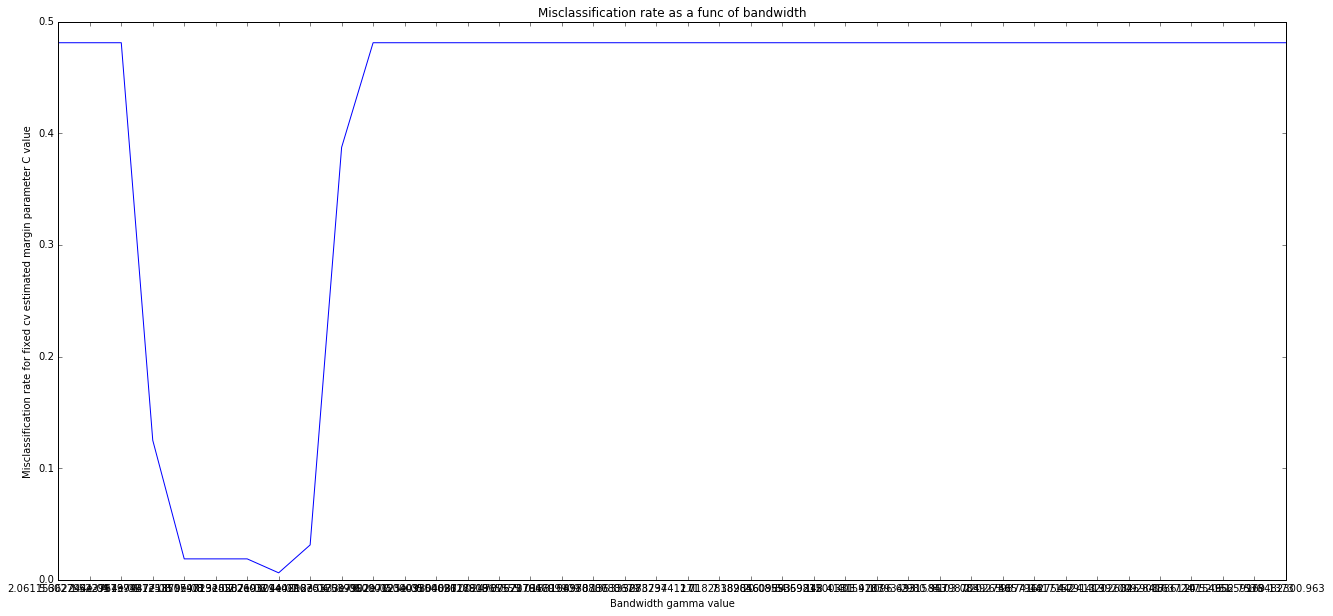

In [10]:
# plot the cross-validation estimates of the misclassification rate
# as a function of bandwidth for fixed margin parameter at its best estimated value
pyplot.figure(figsize=(22,10))
ax=pyplot.gca()  
ax.set_xticks(np.linspace(0,1,rangeSize))   
ax.set_xticklabels(lis)
ax.set_ylim(0, 0.5) 
ax.set_xlabel('Bandwidth gamma value')
ax.set_ylabel('Misclassification rate for fixed cv estimated margin parameter C value')
ax.set_title('Misclassification rate as a func of bandwidth')
pyplot.plot(np.linspace(0,1,rangeSize), rate[19, :])
pyplot.show()

In [11]:
# misclassification rate on test set with the selected parameter by cv
tuned_parameters = {'C': [bestC1], 'gamma': [bestGamma1]}
clf = GridSearchCV(svm.SVC(kernel='rbf'), tuned_parameters, cv=5, scoring=accuracy_scorer)
clf = clf.fit(pixels_train, label_train)
label_pred = clf.predict(pixels_test)
error_rate = 1-accuracy_score(label_test, label_pred)
print('The test estimates of the misclassification rate with the parameter values selected by cross validation is:')
print error_rate

The test estimates of the misclassification rate with the parameter values selected by cross validation is:
0.025


Q4: Compare the two classifiers. Is a linear SVM a good choice for this data, or should we use a non-linear
one?

Answer: Choose non-linear one, even though they have the same test error rate but the range for parameters I have chosen for magin parameter C and bandwidth gamma are quite wide, it is possible for both linear SVM and non-linear SVM to find a best fit. Non-linear SVM has a better performance overall than linear SVM if we choose a smaller range for parameters when the number of features of data are way smaller than the number of data points. 

Q5: (Bonus) Optimize the margin parameter and kernel bandwidth on the training data. (That is, don’t
do cross validation.) Compare your classification performance with the performance above. Do you
suffer from overfitting?

In [12]:
train_rate = np.zeros(rangeSize*rangeSize,)
i = 0

for c in lis:
    for g in lis:
        # run rbf svm for each possible value
        clf = svm.SVC(kernel='rbf', C=c, gamma=g)
        clf = clf.fit(pixels_train, label_train)
        label_pred = clf.predict(pixels_train)
        train_error_rate = 1-accuracy_score(label_train, label_pred)
        # store this error rate to array
        train_rate[i] = train_error_rate
        i +=1
        
print train_rate

[ 0.48125  0.48125  0.48125 ...,  0.       0.       0.     ]


In [13]:
# find the best value for C and gamma by finding the minimum training error rate

# after reshape, the index(i, j) for each training error rate
# i represents the index of C and j represents the index of gamma
train_rate = train_rate.reshape(rangeSize, rangeSize)
print np.where(train_rate == train_rate.min())

(array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 2

In [14]:
# randomly choose indices for c and gamma
# check the minimum value
print train_rate[20,11]

0.0


In [15]:
c=lis[20]
g=lis[11]
# run rbf svm with the best c and g without cross validation 
clf = svm.SVC(kernel='rbf', C=c, gamma=g)
clf = clf.fit(pixels_train, label_train)
label_pred = clf.predict(pixels_test)
test_error_rate = 1-accuracy_score(label_test, label_pred)
print test_error_rate

0.575


Answer: Yes, this is overfitting obviously because the train error rate is 0 but test error rate is 0.575 which is > 0.5 means it is worse than random guessing. Compared to the previous result, the test error rate is 0.025 which is way smaller than 0.575, classification with cross validation has a better performance overall.

6.(Extra bonus) Implement the SVM yourself using a package for mathematical optimization for your
language of choice.

In [16]:
from scipy.optimize import minimize

n = label.shape[0]

# Define the objective function
# x is Lagrange multipliers 
def objective(x, sign = 1.0):
    summ = 0
    for i in range(n):
        for j in range(n):
            summ += x[i]*x[j]*label[i]*label[j]*np.dot(pixels[i,:], pixels[j, :])
    return sign*(np.sum(x)-0.5*summ)

# Define the constraints
def constraint1(x):
    return np.sum(label*x)

# initialize x
x0 = np.random.rand(n,)
cons = ({'type': 'eq', 'fun': constraint1})

# Get the solution by scipy.optimize package
solution = minimize(objective,x0,method='SLSQP',\
                    constraints=cons)

x = solution.x
print ("The optimized value for each Lagrange Multipliers is:")
print x

The optimized value for each Lagrange Multipliers is:
[  1.06312004e+08   1.76956849e+08   4.58984959e+08   1.65352891e+08
   2.96170415e+08   1.86579292e+08   6.55341384e+07   1.98949086e+08
   3.48735017e+07   6.67322778e+07   4.33837831e+07   1.24278548e+08
  -3.65851636e+07   3.51173754e+07   1.43666632e+08   1.51293310e+08
   1.39817183e+08   1.42371270e+08   1.42879595e+08   2.90537374e+08
   2.45869370e+08   2.02304421e+08   3.88277139e+08   6.14520683e+07
   2.56951182e+08   1.03491929e+08   2.40999386e+08   1.63229707e+08
   2.70849469e+08   1.99379297e+08   1.53771278e+08   5.17986926e+07
   1.10194273e+08   5.18686505e+07   3.64639390e+07   4.02601382e+08
   3.00407662e+08   1.50057808e+08   2.07206348e+08   1.28103717e+08
   3.48695445e+08   1.38781132e+08   2.00211516e+07   8.36004482e+07
   1.23080406e+08   5.00445726e+07   2.22098964e+08   1.85645030e+08
   9.32214026e+07   1.62678226e+08   2.03704807e+08   2.66640610e+08
   1.27253272e+08   3.38332304e+07   1.46415378e+